Regresión Lineal Multivariable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#DataFrame
#Leer los datos
df = pd.read_csv('RealEstate.csv')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
#Visualizar las primeras 5 observaciones
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
#Seleccionamos las columnas que utilizaremos para el entrenamiento del modelo
#Columnas 1 a la 6 inclusive
x = df.iloc[: , 1:7]
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
#Convertir x en un numpy array
x = np.array(x)
x

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

In [ ]:
#Extrayendo la variable de salda Y del data set
y = np.array(df.iloc[: , 7])
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

##Funciones

In [ ]:
#Función para estandarizar los datos
def estanderizarDatos(data):
  prom = data.mean(axis = 0) #Axis=0 devuelve el promedio por columna, Axis=1 devuelve el promedio por fila
  std = np.std(data, axis=0)

  datos_est = (data - prom)/std

  return datos_est


In [ ]:
#Función para calcular el costo
def calcular_costo(theta, x, y):
  m = float(x.shape[0])

  hyp = x @ theta #El @ sirve para realizar la multiplicación matricial según álgebra lineal (fila * columna)

  J = (1/(2*m)) * sum((hyp - y)**2)

  return J

In [ ]:
#Función paso gradiente
def paso_gradiente(theta_actual, x, y, alpha):
  theta_grad = np.zeros(theta_actual.shape)

  m = float(x.shape[0])
  n = theta_actual.shape[0]

  hyp = x @ theta_actual

  for i in range(0, n):
    theta_grad[i] = -(1/m) * sum((hyp - y)*x[:,i])

  #Actualizar los valores de theta
  theta_actual = theta_actual + alpha * theta_grad

  return theta_actual

In [ ]:
#Función Gradient Descent
def gradient_descent(theta_inicial, x, y, learning_rate, num_iter):
  #Valores Iniciales
  theta = theta_inicial

  #Historial de costos
  costo_historial = []

  for i in range (0, num_iter):
    costo_historial.append(calcular_costo(theta, x ,y))
    theta = paso_gradiente(theta, x ,y ,learning_rate)
  return[theta, costo_historial]

##Entrenando


In [ ]:
#Añadir la columna de 1s al dataset
x = np.append(np.ones([x.shape[0],1]), estanderizarDatos(x), axis=1)
x

array([[ 1.        , -0.82368321,  1.25562833, ...,  2.00740743,
         1.12542986,  0.44876222],
       [ 1.        , -0.82368321,  0.15708622, ...,  1.66750286,
         0.91244418,  0.40113894],
       [ 1.        ,  1.54115111, -0.38779067, ...,  0.30788458,
         1.48686011,  0.68818339],
       ...,
       [ 1.        ,  0.35873395,  0.09556786, ...,  0.98769372,
         0.82289338,  0.42397202],
       [ 1.        , -0.52896662, -0.84478419, ...,  0.30788458,
        -0.18475479,  0.4768143 ],
       [ 1.        ,  1.24643452, -0.98539758, ...,  1.66750286,
         0.42757905,  0.63534112]])

In [ ]:
# Visualizar el data frame
pd.DataFrame(x)

,0,1,2,3,4,5,6
0,1.0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,1.0,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.0,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.0,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,1.0,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937
...,...,...,...,...,...,...,...
409,1.0,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835
410,1.0,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341
411,1.0,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972
412,1.0,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814


In [ ]:
#Hiperparámetros
alpha = 0.05
iter = 1000

In [ ]:
#thetas iniciales
theta = np.zeros([x.shape[1]])
theta

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Llamando a Gradient Descent
[thetaFinal, costos] = gradient_descent(theta, x, y, alpha, iter)

In [ ]:
thetaFinal

array([37.98019324,  1.44924228, -3.06881082, -5.65535337,  3.33440164,
        2.79513866, -0.18937773])

Según los datos de theta obtenidos podemos saber la influencia de los datos según las columnas que tengamos.
Influye negativamente o positivamente, son indicadores respecto a Y

In [ ]:
costos[-10:]

[38.565858906772924,
 38.56585890219854,
 38.5658588976926,
 38.565858893253996,
 38.56585888888184,
 38.56585888457508,
 38.56585888033268,
 38.56585887615378,
 38.56585887203735,
 38.56585886798253]

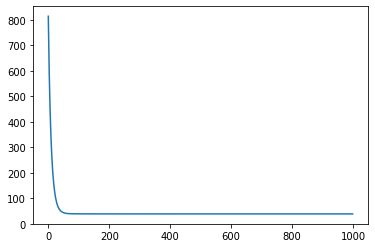

In [ ]:
plt.plot(range(0,iter),costos)